# MOVIES DATA ANALYSIS

Details:
* Student name: Kelvin Kitonga Nzomo
* Student pace:  full time
* Scheduled project review date/time: 23/05/2022 10:00 AM
* Instructor name: Antonny Muiko



# 1.0 Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. 

They have decided to create a new movie studio, but they don’t know anything about creating movies. 

You are charged with exploring what types of films are currently doing the best at the box office. 

You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


## 1.1 Objectives:
    1. Determine the most popular genre of films
    2. Determine the most profitable genres of films
    3. Establish the relationship between movie ratings and profitability
    4. What is the relationship between domestic and foreign ratings of a movie and its ratings.
    5. Which studio was most profitable and what genre was produced

In [272]:
#start with importation of python libraries that will be needed during data cleaning, data analysis and data visualizatio

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline






## 2.0 DATA ANALYSIS ROAD MAP
Checklist that is followed for this analysis:

        1. Data exploration
        2. Data Cleaning
        3. Data aggregation
        4. Data Visualization
        5. Conclusion
        6. Recommendations

In [329]:
# load the datasets that will be need in this analysis. I shall use aliasing to faciliate easier analyses.
# the three data sets that shall be used include: bom.movie_gross.csv, title.basics.csv and title.ratings.csv
# it was observed that all the three data files share common columns which can be used in joining them.

#load the data in data frames:

movie_gross_df = pd.read_csv('datasets/bom.movie_gross.csv')

title_basics_df = pd.read_csv('datasets/title.basics.csv')

title_ratings_df = pd.read_csv('datasets/title.ratings.csv')


# 2.1 EXPLORATION OF THE DATA SETS


The data shall be explored by determining the below so that we can have a better understanding of our data:
1. The first two rows of the data frame
2. The shape of the dataframe
3. The data types of the dataframes


### i. Explore Movie Gross Dataset

In [330]:
# print out first 4 records in the dataframe
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [331]:
#print out the number of columns and rows in the dataset
movie_gross_df.shape

(3387, 5)

In [332]:
# print out information on various parameters of data in the dataframe
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### Observations
We note that the data the in movie gross datasets contains finacial information regarding various movies and their respective years. 
The data set has 5 columns and 3387 rows.There are 3386 movie records. 

The columns in the dataset include title, studio, domestic gross, foreign gross and year. 

The most of the data types are inline with our expectations except the foreign gross column whose records are indicated as onjects instead of float as in the type of data contained in column domestic gross.

Also there are missing data in the following columns: studio, domestic_gross and foreign_gross.


## ii. Explore Title Basics Dataset

In [333]:
# print out first 4 records in the dataframe
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [334]:
#print out the number of columns and rows in the dataset
title_basics_df.shape

(146144, 6)

In [335]:
# print out information on various parameters of data in the dataframe
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


### Observations

This dataset has 6 columns which include: tconst, primary_title, original_title, start_year, runtime_minutes and genres.
The dataset is focused on information regarding films in different genres that that were released in different years.

The dataset is composed of 146,144 records and information on 146,144 films. 

The data types are as they should be expected with columns containing string classified as objects while numerical values for year and runtime_minutes as float and integers respectively.
The columns with missing data in this data set include original_title, runtime_minutes and genres.

this data set has fields that are common with the other two datasets:

    a) The movie gross datasets has a title column that may be shared with either of the two title columns
    b) The tconst field is similar to the tconst column that is contained in the title ratings dataset.


## iii. Explore Title Ratings Dataset

In [336]:
# print out first 4 records in the dataframe
title_ratings_df .head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [337]:
#print out the number of columns and rows in the dataset
title_ratings_df.shape

(73856, 3)

In [361]:
# print out information on various parameters of data in the dataframe
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


tt4489160    1
tt2093944    1
tt5833658    1
tt5247282    1
tt6449232    1
            ..
tt4059696    1
tt6043842    1
tt3338188    1
tt3914120    1
tt6288290    1
Name: tconst, Length: 73856, dtype: int64

### Observations

This dataset contains data regarding fillm ratings for various movies which are uniuquely identified by the index colum which is tconst. 

This dataset has 3 columns including tconst, averageratings and numvotes.
The tconst column is common to this dataset and the title_basics dataset.
There are 73,865 rows in the data. We note that the data does not have missing records. Additionally, the dataset has the correct data type for the three fields. The datatypes for columns 1,2 and 3 are object, float and integer respectively.


## 2.2 DATA CLEANING

### Data cleaning the movie gross dataset

In [339]:
# This is to check for missing values and duplicated values in the dataset
print(movie_gross_df.isna().sum())
movie_gross_df.duplicated().value_counts()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


False    3387
dtype: int64

In [340]:
#sampling and remedying missing values for studio column
#sampling
misstudio_movie_gross_df = movie_gross_df[movie_gross_df["studio"].isna()].sample(5, random_state=1)
print(misstudio_movie_gross_df)

#removing missing values
movie_gross_df.dropna(subset=["studio"], inplace=True)

                              title studio  domestic_gross foreign_gross  year
933           Keith Lemon: The Film    NaN             NaN       4000000  2012
555         Fireflies in the Garden    NaN         70600.0       3300000  2011
2825               Secret Superstar    NaN             NaN     122000000  2017
210   Outside the Law (Hors-la-loi)    NaN         96900.0       3300000  2010
1862                 Plot for Peace    NaN          7100.0           NaN  2014


In [341]:
#sampling and remedying missing values for domestic_gross column
#sampling
misdome_gross_movie_gross_df = movie_gross_df[movie_gross_df["domestic_gross"].isna()].sample(5, random_state=1)
print(misdome_gross_movie_gross_df)

#replace the missing values with 0
movie_gross_df["domestic_gross"] = movie_gross_df["domestic_gross"].replace(np.nan, 0)

                               title studio  domestic_gross foreign_gross  \
1659                      Jessabelle    LGF             NaN       7000000   
1268                      22 Bullets  Cdgm.             NaN      21300000   
1368                         6 Souls   RTWC             NaN        852000   
306                 Badmaash Company   Yash             NaN         64400   
1975  Surprise - Journey To The West     AR             NaN      49600000   

      year  
1659  2014  
1268  2013  
1368  2013  
306   2010  
1975  2015  


In [342]:
# samplying and remedying for missing values in the foreign gross column
misforgross_movie_gross_df = movie_gross_df[movie_gross_df["foreign_gross"].isna()].sample(5, random_state=1)
print(misforgross_movie_gross_df)

movie_gross_df["foreign_gross"] = movie_gross_df["foreign_gross"].replace(",", "")

# cast the datatype of foreign gross column into a float
movie_gross_df["foreign_gross"] = movie_gross_df["foreign_gross"].str.replace(',', '').astype(float)

print(movie_gross_df.info())
# fill in missing values with the median of the column
movie_gross_df["foreign_gross"] = movie_gross_df["foreign_gross"].fillna(movie_gross_df["foreign_gross"].median())

                                 title studio  domestic_gross foreign_gross  \
2204  Love Live! The School Idol Movie     AZ        116000.0           NaN   
1766      But Always (Yi Sheng Yi Shi)     CL        431000.0           NaN   
1736                       The Captive    A24       1100000.0           NaN   
1858                Love is in the Air    FCW          8400.0           NaN   
2523                    Swiss Army Man    A24       4200000.0           NaN   

      year  
2204  2015  
1766  2014  
1736  2014  
1858  2014  
2523  2016  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   2033 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(

In [343]:
print(movie_gross_df.isna().sum())

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


### Observation
While there are no duplicate values in the dataset. We note that some of the fields have missing values. Thhis applies ato studio domestic_gross and foreign gross. Foreign gross, has the largest case of missing values. 

Studio names are key to identifying the most profitabke studios, therefore we shall remove the records with missing values as this will ensure clean data that is not greatly affected by removal of 5 of the 3387 records.

The domestic gross columm has missing values. This may mean that they were not input correctly or there were no domestic sales. because the number of missing values is not material, we shall replace them with 0 and not the mean so as to account for scenarios where the movies were only consumed by the international market as in streamed movies on streaming sites such as netflix.


The foreign gross colum was an object type but should be converted into a float for data wrangling. Then we need to fill in the missing values with the median of the colum since there are atleat 30% missing records in that  column.


### Data cleaning the title ratings dataset

In [344]:
# This is to check for missing values and duplicated values in the dataset
print(title_ratings_df.isna().sum())
title_ratings_df.duplicated().value_counts()

tconst           0
averagerating    0
numvotes         0
dtype: int64


False    73856
dtype: int64

### Observation
While there are no duplicate values in this dataset. 
We note that this dataset had no missing values as well.


### Data cleaning the title basics dataset

In [345]:
# This is to check for missing values and duplicated values in the dataset
print(title_basics_df.isna().sum())
title_basics_df.duplicated().value_counts()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


False    146144
dtype: int64

In [346]:
#sample missing values for original and genre columns
mistitle_title_basics_df = title_basics_df[title_basics_df["original_title"].isna()].sample(5, random_state=1)
mistitle_title_basics_df


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
112608,tt6603544,Utopians,NaN,2015,NaN,NaN
107378,tt6288348,Deadly Affection,NaN,2017,NaN,NaN
79274,tt4548042,Urban Legend: The Blind Side Strangler,NaN,2016,NaN,NaN
115983,tt6882442,Hirugao: Love Affairs in the Afternoon,NaN,2017,125.0,Romance
115934,tt6877572,X A 7,NaN,2020,NaN,NaN


In [347]:
#replacing the missing names
title_basics_df["original_title"] = title_basics_df["original_title"].fillna(title_basics_df["primary_title"])

#fill in the runtime with median of the column
title_basics_df["runtime_minutes"] = title_basics_df["runtime_minutes"].fillna(title_basics_df["runtime_minutes"].median())


In [348]:
#sample the genres column

misrating_title_basics_df = title_basics_df[title_basics_df["genres"].isna()].sample(5, random_state=1)
misrating_title_basics_df 

#drop records that have missing genres
title_basics_df.dropna(subset=["genres"], inplace=True)

### Observation
This dataset has missing values but no duplicate values.

The columns with missing values include the original title, the runtime minutes and the genres columns.

We shall replace the missing names in the original title column with those in the primary title, this is because the primary titile name is widely used and can be applied in merging of this data frame.
We shall remove the records without original title as well as the records without genres. 

The missing values for the runtime minutes will be filled in from the median of the column.



In [349]:
print(title_basics_df.isna().sum())

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


The data is now clean for the next stage of analysis

## 2.3 DATA AGGREGATION

We shall merge the data sets so that they can be utilized properly for the visualizations

In [353]:
#movie_gross_df = change title to primary title in preparation for merging

movie_gross_df.rename(columns={'title': 'primary_title'}, inplace=True)

#merging the data sets

full_movie_df = movie_gross_df.merge(title_basics_df, on='primary_title').merge(title_ratings_df, on='tconst')


In [359]:
#description of the 3 merge datasets
print(full_movie_df.head(1))
print(full_movie_df.isna().sum())
print(full_movie_df.shape)
print(full_movie_df.info())

  primary_title studio  domestic_gross  foreign_gross  year     tconst  \
0   Toy Story 3     BV     415000000.0    652000000.0  2010  tt0435761   

  original_title  start_year  runtime_minutes                      genres  \
0    Toy Story 3        2010            103.0  Adventure,Animation,Comedy   

   averagerating  numvotes  
0            8.3    682218  
primary_title      0
studio             0
domestic_gross     0
foreign_gross      0
year               0
tconst             0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64
(3016, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 0 to 3015
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    3016 non-null   object 
 1   studio           3016 non-null   object 
 2   domestic_gross   3016 non-null   float64
 3   foreign_gross    301

In [366]:
ratings = full_movie_df["numvotes"].value_counts()
ratings

6        16
12       13
10       12
7        11
8        11
         ..
4731      1
60026     1
12921     1
4727      1
12290     1
Name: numvotes, Length: 2738, dtype: int64

### Observations

The three data sets have been joined with a inner join so that only the records that are similar in the three datasets are merged into the full_movie_dataset.

The datasets have 3,016 records and 12 columns from the merged datasets.

The data types of 

## 2.4 DATA VISUALIZATION

In [ ]:
1. Determine the most popular genre of films
2. Determine the most profitable genres of films
3. Establish the relationship between movie ratings and profitability
4. What is the relationship between domestic and foreign ratings of a movie and its ratings.
5. Which studio was most profitable and what genre was produced

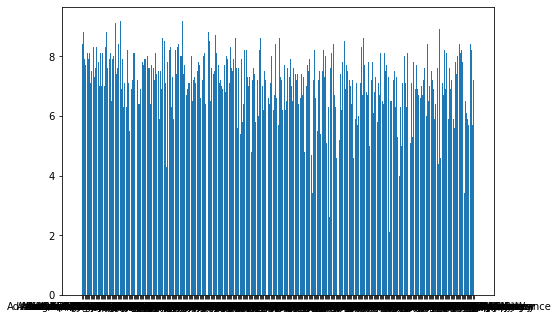

In [364]:
# Determine the most popular genre of films

#group by genre against ratings
#plot line graph
ratings = full_movie_df["numvotes"].value_counts()





# Set up plots
fig, (ax1) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = heroes_df["Publisher"].value_counts()
top_5_counts = value_counts.iloc[:5]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(top_5_counts.index, top_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Distribution of Superheroes by Publisher")
ax2.set_title("Top 5 Publishers by Count of Superheroes");


In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=None,
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=None,
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(None)
ax1.set_xlabel(None)
ax1.set_ylabel("Sale Price")
ax2.set_title(None)
ax2.set_xlabel(None)
ax2.set_ylabel("Sale Price");

In [ ]:
# Determine the most profitable genres of films

In [ ]:
#Establish the relationship between movie ratings and profitability

In [ ]:
#What is the relationship between domestic and foreign ratings of a movie and its ratings.

In [ ]:
#Which studio was most profitable and what genre was produced

## 2.5 CONCLUSION
   

 ## 2.6 Recommendations